# AI4Good - Floor Damage Detection Using Deep Learning CNN
> This notebook is used to build a convolutional neural network model that can identify damage areas from undamaged once after the occurance of flood in a region.

In [19]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#tf.config.set_visible_devices([], 'GPU')


In [20]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
tf.test.is_gpu_available()

True

In [22]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [23]:
batch_size = 16
IMG_SHAPE = 150 

In [24]:
train_dir = os.path.abspath(os.path.join('.', 'dataset', 'train'))
val_dir = os.path.abspath(os.path.join('.', 'dataset', 'val'))

In [25]:
'''
image_gen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
'''
image_gen = ImageDataGenerator(
                    rescale=1./255)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 338 images belonging to 2 classes.


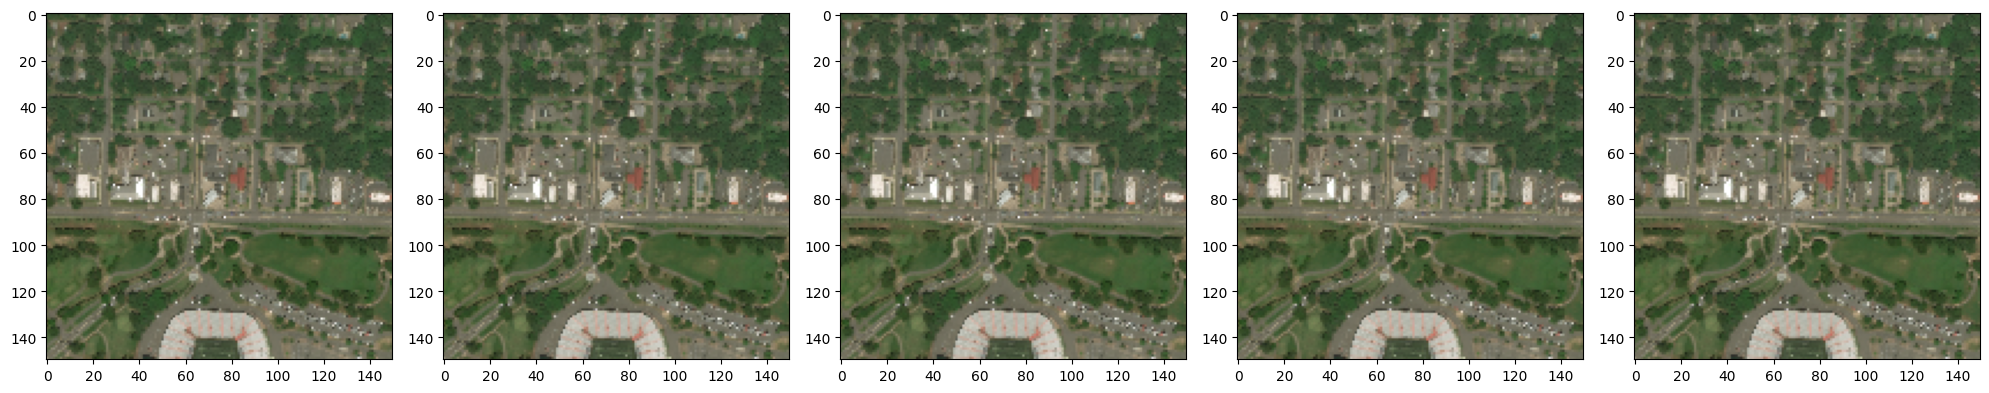

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [27]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE))

Found 110 images belonging to 2 classes.


In [31]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

#model.add(Dropout(0.2))
model.add(Dense(2))

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
%%time
epochs = 10

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

<timed exec>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
22/22 [==============================] - 17s 763ms/step - loss: 1.4802 - accuracy: 0.6775 - val_loss: 0.5137 - val_accuracy: 0.8091
Epoch 2/10
22/22 [==============================] - 15s 685ms/step - loss: 0.5282 - accuracy: 0.8018 - val_loss: 0.4964 - val_accuracy: 0.8091
Epoch 3/10
22/22 [==============================] - 15s 670ms/step - loss: 0.5004 - accuracy: 0.8018 - val_loss: 0.4877 - val_accuracy: 0.8091
Epoch 4/10
22/22 [==============================] - 14s 640ms/step - loss: 0.5033 - accuracy: 0.8018 - val_loss: 0.5614 - val_accuracy: 0.8091
Epoch 5/10
22/22 [==============================] - 17s 767ms/step - loss: 0.5265 - accuracy: 0.8018 - val_loss: 0.4921 - val_accuracy: 0.8091
Epoch 6/10
22/22 [==============================] - 15s 715ms/step - loss: 0.5131 - accuracy: 0.8018 - val_loss: 0.4879 - val_accuracy: 0.8091
Epoch 7/10
22/22 [==============================] - 15s 668ms/step - loss: 0.5006 - accuracy: 0.8018 - val_loss: 0.5042 - val_accuracy: 0.8091

In [38]:
damaged_region = len(glob.glob(os.path.abspath(os.path.join('.', 'dataset', 'train', 'damage', '*'))))
undamaged_region = len(glob.glob(os.path.abspath(os.path.join('.', 'dataset', 'train', 'no_damage', '*'))))
total = damaged_region + undamaged_region
undamaged_region / total

0.8017751479289941

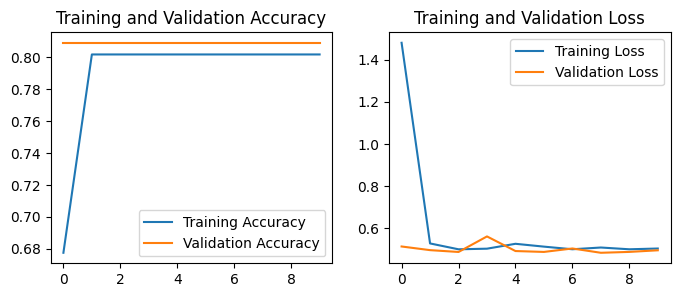

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()